### Import Libraries

In [197]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_palette("Paired")

### Reading Data

In [198]:
# Reading the data

data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Columns:

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [199]:
data.shape

(159, 7)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [201]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [202]:
# Checking the null values

data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [203]:
# Checking species count

data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

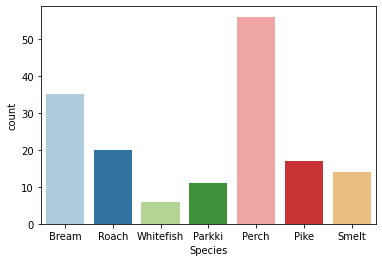

In [204]:
sns.countplot(data.Species)
plt.show()

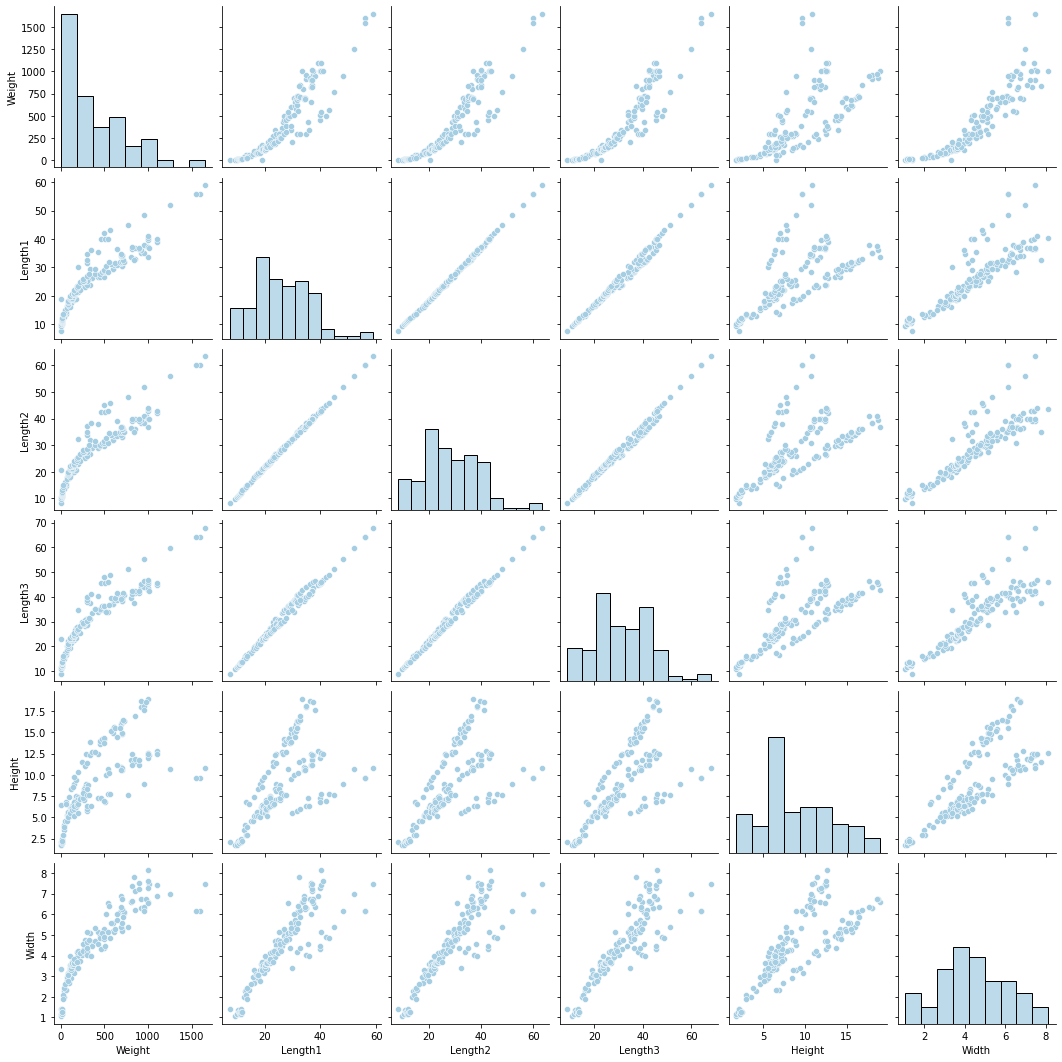

In [205]:
# Pair plot for all numerical variables

sns.pairplot(data)
plt.show()

#### The above plot shows Linear Relationship between all the features.

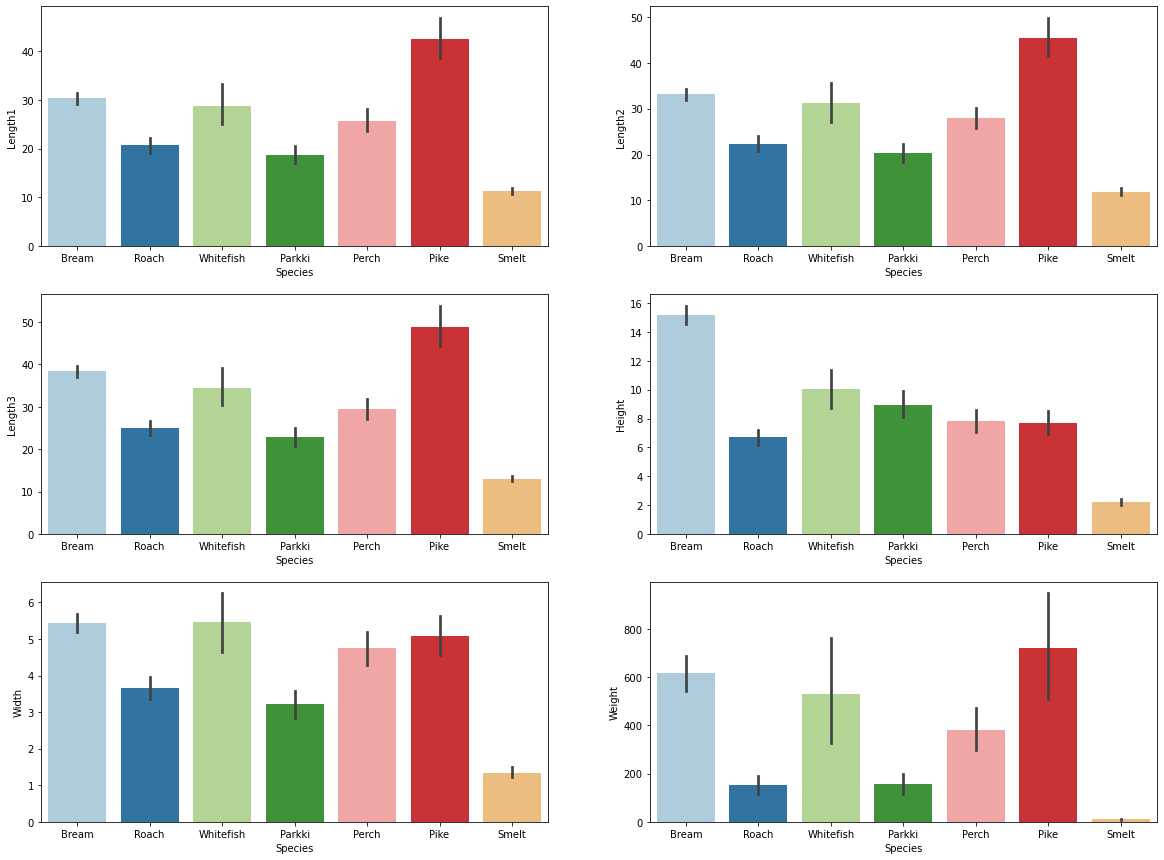

In [206]:
plt.figure(figsize=[20,15])
plt.subplot(3,2,1)    
sns.barplot(data=data, x="Species", y="Length1")
plt.subplot(3,2,2)    
sns.barplot(data=data, x="Species", y="Length2")
plt.subplot(3,2,3)    
sns.barplot(data=data, x="Species", y="Length3")
plt.subplot(3,2,4)    
sns.barplot(data=data, x="Species", y="Height")
plt.subplot(3,2,5)    
sns.barplot(data=data, x="Species", y="Width")
plt.subplot(3,2,6)    
sns.barplot(data=data, x="Species", y="Weight")

plt.show()

### Correlation

In [207]:
# Checking Correlaion

cor = data.corr()
cor.style.background_gradient(cmap='coolwarm')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


### Outliers Treatment

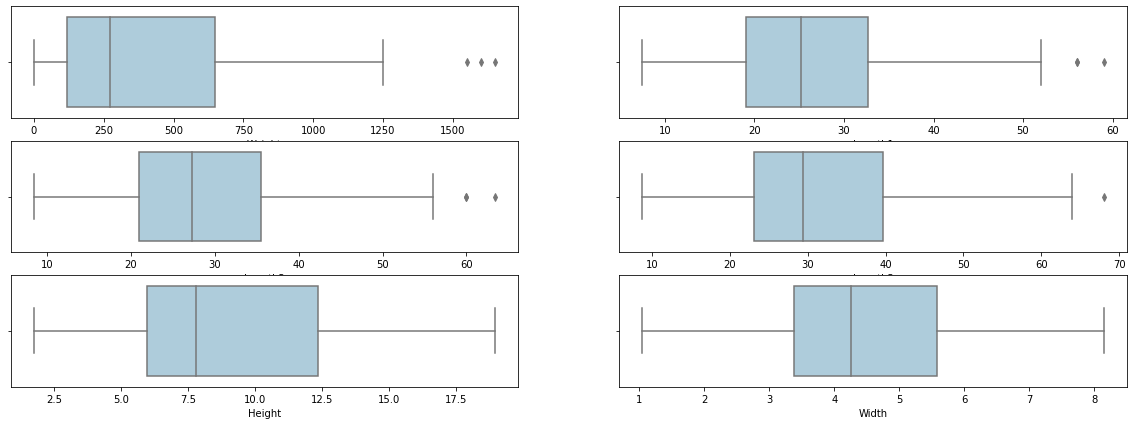

In [208]:
# Checking outliers

plt.figure(figsize=[20,7])
plt.subplot(3,2,1)    
sns.boxplot(data.Weight)
plt.subplot(3,2,2)    
sns.boxplot(data.Length1)
plt.subplot(3,2,3)    
sns.boxplot(data.Length2)
plt.subplot(3,2,4)    
sns.boxplot(data.Length3)
plt.subplot(3,2,5)    
sns.boxplot(data.Height)
plt.subplot(3,2,6)    
sns.boxplot(data.Width)

plt.show()

In [209]:
# Coping the date into new data frame.

new_df = data.copy()

In [210]:
# Removing the outliers

num_col = new_df.select_dtypes(exclude="object")

for col in num_col:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    
    IQR = Q3-Q1
    
    # Upper bound
    upper = np.where(new_df[col] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(new_df[col] <= (Q1-1.5*IQR))
 
    new_df.drop(upper[0], inplace = True)
    new_df.drop(lower[0], inplace = True)
    

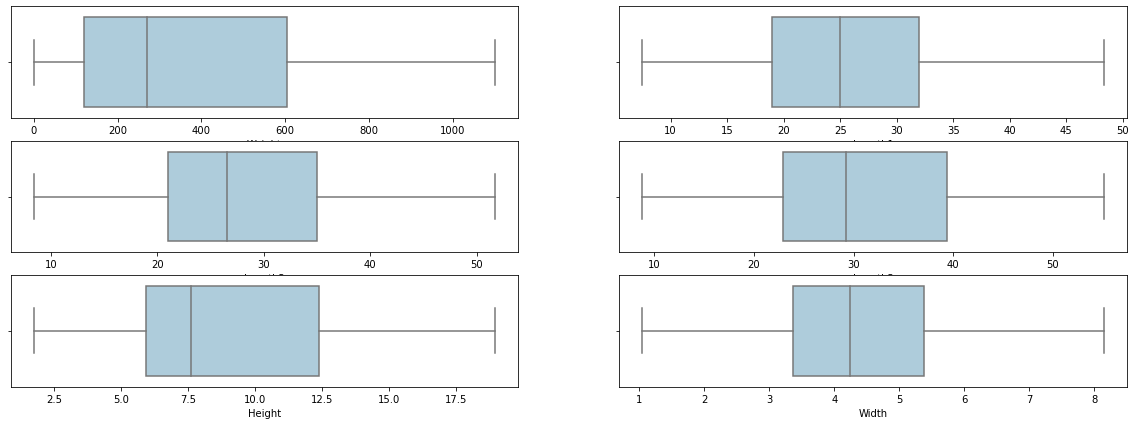

In [211]:
# Ploting the BoxPlot again to cross check if the outliers are removed.

plt.figure(figsize=[20,7])
plt.subplot(3,2,1)    
sns.boxplot(new_df.Weight)
plt.subplot(3,2,2)    
sns.boxplot(new_df.Length1)
plt.subplot(3,2,3)    
sns.boxplot(new_df.Length2)
plt.subplot(3,2,4)    
sns.boxplot(new_df.Length3)
plt.subplot(3,2,5)    
sns.boxplot(new_df.Height)
plt.subplot(3,2,6)    
sns.boxplot(new_df.Width)

plt.show()

### Handling Categorical Variable - By creating dummy variable

In [212]:
# Creating dummy for categorical feature.

dummy = pd.get_dummies(new_df["Species"])
dummy.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [213]:
# Concatinating both the data frames

new_df = pd.concat([new_df, dummy], axis=1)

# Droping the Species column from new_df because we have created the dummy variable

new_df.drop("Species", axis=1, inplace=True)

new_df.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


### Performing Features Scaling

In [214]:
# Class instance

scaler = MinMaxScaler()

# Create the list of num variables whose scaling needs to be done

num_var = ['Weight','Length1', 'Length2', 'Length3', 'Height', 'Width']

new_df[num_var] = scaler.fit_transform(new_df[num_var])

In [215]:
new_df.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.220000,0.384804,0.392610,0.457883,0.568334,0.418978,1,0,0,0,0,0,0
1,0.263636,0.404412,0.413395,0.483801,0.624055,0.459235,1,0,0,0,0,0,0
2,0.309091,0.401961,0.418014,0.481641,0.618123,0.514279,1,0,0,0,0,0,0
3,0.330000,0.460784,0.475751,0.533477,0.638566,0.480365,1,0,0,0,0,0,0
4,0.390909,0.465686,0.475751,0.544276,0.621966,0.576004,1,0,0,0,0,0,0


### Spliting the Data into X and Y

In [216]:
# Spliting the data into X and y

y = new_df["Weight"]
X = new_df.drop("Weight", axis=1)

In [217]:
X.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.384804,0.392610,0.457883,0.568334,0.418978,1,0,0,0,0,0,0
1,0.404412,0.413395,0.483801,0.624055,0.459235,1,0,0,0,0,0,0
2,0.401961,0.418014,0.481641,0.618123,0.514279,1,0,0,0,0,0,0
3,0.460784,0.475751,0.533477,0.638566,0.480365,1,0,0,0,0,0,0
4,0.465686,0.475751,0.544276,0.621966,0.576004,1,0,0,0,0,0,0


In [218]:
y.head()

0    0.220000
1    0.263636
2    0.309091
3    0.330000
4    0.390909
Name: Weight, dtype: float64

### Train Test Split

In [219]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [220]:
X_train.shape, y_train.shape

((124, 12), (124,))

In [221]:
X_test.shape, y_test.shape

((31, 12), (31,))

### Fitting the Model

In [222]:
# Fitting the model

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [223]:
# Model Coefficients

print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -0.28971675343164693
Model coefficients:  [ 7.19855042e-01  9.98659468e-01 -1.20765588e+00  6.46587121e-01
  3.70027210e-01 -9.43881704e-02 -5.70129561e-02 -1.26777236e-02
 -3.60933064e-02 -2.34045523e-02  2.24274079e-01 -6.97369758e-04]


### Checking the model accuracy on training data

In [224]:
# Prediction on train data set

y_train_pred = reg.predict(X_train)

In [225]:
# Model Accuracy on Train Data

r2_score(y_true=y_train, y_pred=y_train_pred)

0.9490024680591508

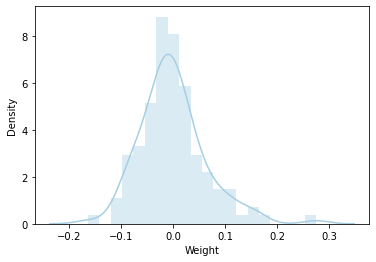

In [226]:
# Check is the error terms are normally distributed or not

res = y_train-y_train_pred

sns.distplot(res, bins=20)
plt.show()

## Making prediction on Test Data


In [227]:
# Prediction on Test Data

y_test_pred = reg.predict(X_test)

In [228]:
# Check accuracy of model on Test Data

r2_score(y_true=y_test, y_pred=y_test_pred)

0.9361037018468653

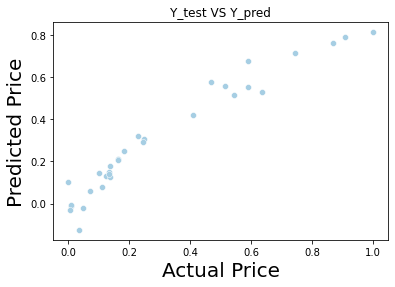

In [229]:
# Lets plot the scatter plot for actual VS predicted Y value

sns.scatterplot(x=y_test, y=y_test_pred)

plt.title("Y_test VS Y_pred")
plt.xlabel("Actual Price", fontsize=20)
plt.ylabel("Predicted Price", fontsize=20)

plt.show()

#### <span style="color:red">Hence, Our Model Is Ready With 94% of Accuracy </span>